```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [ ]:
!pip install diffusers transformers accelerate safetensors

In [ ]:
#gpu
from diffusers import StableDiffusionImageVariationPipeline
import torch
import matplotlib.pyplot as plt
from io import BytesIO
import requests
from PIL import Image

# Diagram

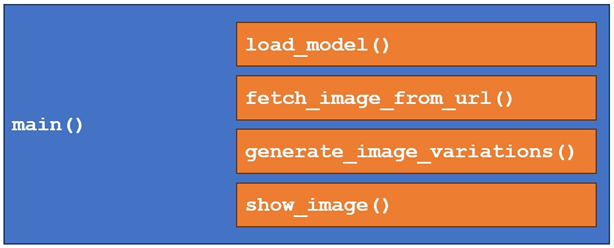

# Code

In [ ]:
def load_model(pretrained_model_or_path):
    pipeline = StableDiffusionImageVariationPipeline.from_pretrained(pretrained_model_or_path, revision="v2.0").to("cuda")
    return pipeline

In [ ]:
def fetch_image_from_url(url):
    response = requests.get(url)
    image_web = Image.open(BytesIO(response.content)).convert("RGB")
    return image_web

In [ ]:
def generate_image_variations(pipeline, image, num_images_per_prompt, num_inference_steps):
    image_results = pipeline(image, num_images_per_prompt=num_images_per_prompt, num_inference_steps=num_inference_steps)
    return image_results["images"]

In [ ]:
def show_images(images):
    num_images = len(images)
    plt.figure(figsize=(15,5))
    for i, img in enumerate(images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Imagem {i+1}')
    plt.show()

In [ ]:
def main():
    pretrained_model_or_path = "lambdalabs/sd-image-variations-diffusers"
    url = "https://s3.amazonaws.com/nightjarprod/content/uploads/sites/130/2021/08/19085635/gEU2QniE6E77NI6lCU6MxlNBvIx-scaled.jpg"
    num_images_per_prompt = 3
    num_inference_steps = 100

    pipeline = load_model(pretrained_model_or_path)
    image_from_url = fetch_image_from_url(url)
    image_variations = generate_image_variations(pipeline, image_from_url, num_images_per_prompt, num_inference_steps)
    show_images(image_variations)

# Execution

In [ ]:
main()